Predictions vs Actual Quality:
Prediction: 0.24760181931313485 	Actual: 0.5
Prediction: 0.3460164692847522 	Actual: 0.5
Prediction: 0.3961424003876066 	Actual: 0.5
Prediction: 0.35952479822296124 	Actual: 0.5
Prediction: 0.35952479822296124 	Actual: 0.5
Prediction: 0.3961424003876066 	Actual: 0.5
Prediction: 0.32238271012109765 	Actual: 0.5
Prediction: 0.24760181931313485 	Actual: 0.5
Prediction: 0.3460164692847522 	Actual: 0.5
Prediction: 0.4596233496809626 	Actual: 0.5
Prediction: 0.5002764730482565 	Actual: 0.3333333333333333
Prediction: 0.3582593865647806 	Actual: 0.3333333333333333
Prediction: 0.4429552094601836 	Actual: 0.3333333333333333
Prediction: 0.6115883711367172 	Actual: 0.6666666666666666
Prediction: 0.38566594422517436 	Actual: 0.3333333333333333
Prediction: 0.48029864377488074 	Actual: 0.6666666666666666
Prediction: 0.32273630716645496 	Actual: 0.5
Prediction: 0.6187205497836339 	Actual: 0.8333333333333334
Prediction: 0.4827929645746536 	Actual: 0.5
Prediction: 0.327635

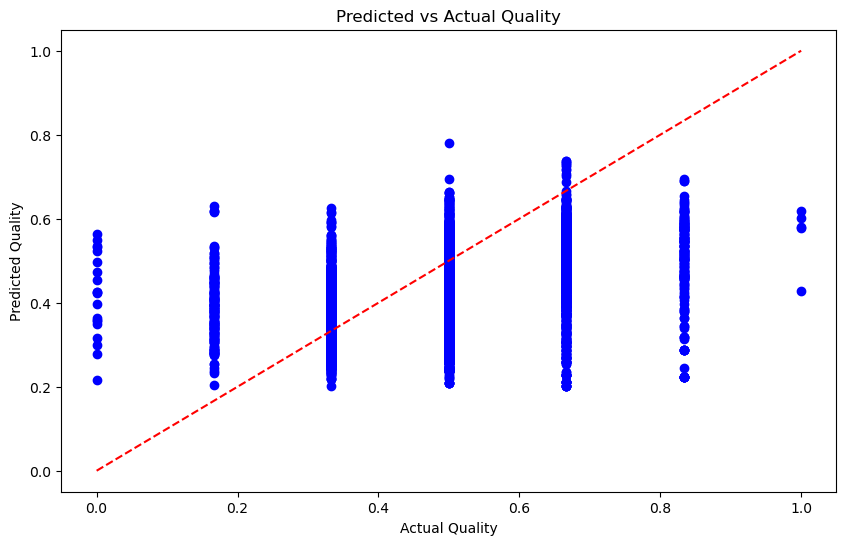

In [5]:
import matplotlib.pyplot as plt
import csv

# Function to read data from CSV file
def read_data(filename):
    data = []
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        next(reader)  # Skip header
        for row in reader:
            data.append(row)
    return data

# Function to convert strings to floats
def convert_to_float(data):
    for row in data:
        for i in range(len(row)):
            row[i] = float(row[i])
    return data

# Function to normalize data
def normalize_data(data):
    for i in range(len(data[0])):
        column = [row[i] for row in data]
        max_val = max(column)
        min_val = min(column)
        for row in data:
            row[i] = (row[i] - min_val) / (max_val - min_val)
    return data

# Function to calculate the mean squared error
def mean_squared_error(predictions, targets):
    total_error = 0
    for i in range(len(predictions)):
        total_error += (predictions[i] - targets[i]) ** 2
    return total_error / len(predictions)

# Function to perform gradient descent
def gradient_descent(data, learning_rate, num_iterations):
    weights = [0 for _ in range(len(data[0]))]
    for _ in range(num_iterations):
        predictions = [sum(data[i][j] * weights[j] for j in range(len(weights))) for i in range(len(data))]
        errors = [predictions[i] - data[i][-1] for i in range(len(data))]
        for j in range(len(weights)):
            gradient = sum(errors[i] * data[i][j] for i in range(len(data))) / len(data)
            weights[j] -= learning_rate * gradient
    return weights

# Function to predict using the learned weights
def predict(data, weights):
    predictions = [sum(data[i][j] * weights[j] for j in range(len(weights))) for i in range(len(data))]
    return predictions

# Read and preprocess data
filename = r'C:\Users\asus\Downloads\wine-quality.csv'
data = read_data(filename)
data = convert_to_float(data)
data = normalize_data(data)

# Split data into features and target
features = [row[:-1] for row in data]
target = [row[-1] for row in data]

# Set hyperparameters
learning_rate = 0.01
num_iterations = 1000

# Perform gradient descent
weights = gradient_descent(features, learning_rate, num_iterations)

# Make predictions
predictions = predict(features, weights)

# Display predictions and actual quality values
print("Predictions vs Actual Quality:")
for i in range(20):
    print("Prediction:", predictions[i], "\tActual:", target[i])

# Calculate mean squared error
mse = mean_squared_error(predictions, target)
print("\nMean Squared Error:", mse)
# Plot predictions vs actual quality
plt.figure(figsize=(10, 6))
plt.scatter(target, predictions, color='blue')
plt.plot([min(target), max(target)], [min(target), max(target)], color='red', linestyle='--')
plt.title('Predicted vs Actual Quality')
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.show()
